# Explanabity of PCA

## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Project/KickLearning/

/content/drive/.shortcut-targets-by-id/1iWelwZQ6yutjZacqvhb1xSPIvi_nlIiH/Project/KickLearning


Lybraries

In [14]:
from os.path import join
import pickle as pk

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [4]:
data_path = join(".", "data")
models_path = join(".", "logs", "tfidf_pca_parameters")

## Explaining the component

In [120]:
princ_compo_indexes = [27, 0, 4, 13]

In [5]:
encoder = pk.load(open(join(models_path, "encoder_with_tfidf_and_pca.pkl"),"rb"))

## Building the dummy vector

In [121]:
scores_list = []
for prin_com in princ_compo_indexes:
    vec = np.zeros(encoder.pca_transformer.n_components_)
    vec[prin_com] = 1
    scores_list.append(pd.Series(encoder.pca_transformer.inverse_transform(vec), index=encoder.tfidf_transformer.get_feature_names()))

## Sorting and normalizing

In [122]:
scores_list = list(map(lambda scores: scores.sort_values(ascending=False).head(10), scores_list))
scores_list = list(map(lambda scores: scores/scores.abs().sum(), scores_list))

## Plots

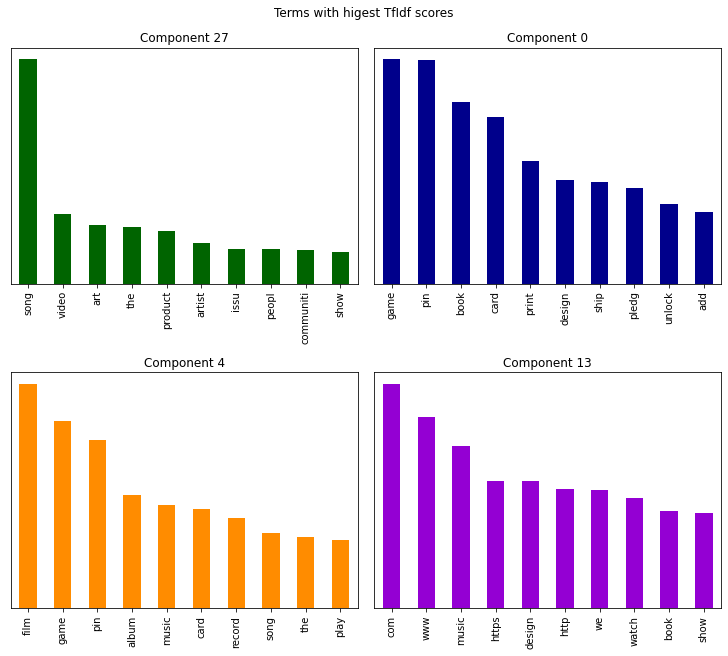

In [134]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
fig.set_size_inches(10, 9)
fig.suptitle("Terms with higest TfIdf scores")
scores_list[0].plot.bar(ax=axs[0,0], color="darkgreen", title="Component {}".format(princ_compo_indexes[0]), yticks=[])
scores_list[1].plot.bar(ax=axs[0,1], color="darkblue", title="Component {}".format(princ_compo_indexes[1]), yticks=[])
scores_list[2].plot.bar(ax=axs[1,0], color="darkorange", title="Component {}".format(princ_compo_indexes[2]), yticks=[])
scores_list[3].plot.bar(ax=axs[1,1], color="darkviolet", title="Component {}".format(princ_compo_indexes[3]), yticks=[])
plt.show()

## Explained variance in PCA

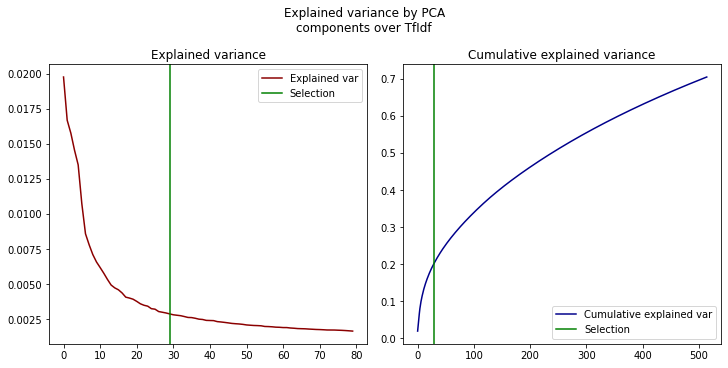

In [139]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)
fig.suptitle("Explained variance by PCA\ncomponents over TfIdf")
fig.set_size_inches(10, 5)
ax1.set_title("Explained variance")
ax1.plot(encoder.pca_transformer.explained_variance_[:80], color="darkred", label="Explained var")
ax1.axvline(29, color="green", label="Selection")
ax1.legend()
ax2.set_title("Cumulative explained variance")
ax2.plot(np.cumsum(encoder.pca_transformer.explained_variance_), color="darkblue", label="Cumulative explained var")
ax2.axvline(29, color="green", label="Selection")
ax2.legend()
plt.show()